Plot density of states(DOS) with energy bin width 0.2eV, 0.1eV, 0.05eV or smaller as you think it makes sense,
for a representative 1D chain of 5, 10, 20, 50 atoms with E0 = -5eV, beta = -1eV. You can ramp up the number of atoms as much as you think is sufficient to appreciate the shape of the DOS. Mark Fermi level assuming spin degeneracy. Plot (x axis: 1,2,3,... are site of atoms in some arbitrary spacing, y axis: value of the eigen state at each site)
the minimum, maximum and the highest occupied and lowest unoccupied energy eigenstates.

In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

In [3]:
def eValue_cal(A,b):
    eigenvalues,eigenvectors = np.linalg.eigh(A)
    if b == True:
        return eigenvalues,eigenvectors
    else:
        return eigenvalues

def create_matrix(E0,b,n,coupled):
    A = np.zeros((n,n))
    for i in range(n):
        A[i,i] = E0
        if i < n-1:
            A[i,i+1] = b
            A[i+1,i] = b
    if coupled== True:
        A[0,n-1] = b
        A[n-1,0] = b
    return A

def multi_systems(E_list,b_list,n_list,C_ele_list):
    sys_no = len(E_list)
    M_list = []
    for i in range(sys_no):
        A = create_matrix(E_list[i],b_list[i],n_list[i],False)
        M_list.append(A)
    tot_n = sum(n_list)
    M_tot = np.zeros((tot_n,tot_n))
    index = 0
    for k in range(sys_no):
        n_k = n_list[k]
        for i in range(n_k):
            for j in range(n_k):
                M_tot[index+i,index+j] = M_list[k][i,j]
        index += n_k
    index_list = [0]
    for i in range(1,sys_no):
        index_list.append(index_list[i-1]+n_list[i-1])
    for i in range(min(n_list)):
        for j in range(sys_no-1):
            M_tot[index_list[j]+i,index_list[j+1]+i] = C_ele_list[j]
            M_tot[index_list[j+1]+i,index_list[j]+i] = C_ele_list[j]
    return M_tot


In [5]:

def spectrum_lines_plot(A):
    ev = eValue_cal(A,False)
    high_ev = ev[-1]
    low_ev = ev[0]
    n = len(ev)
    if n % 2 == 0:
        high_occupied = ev[n//2 - 1]
        low_unoccupied = ev[n//2]
    else:
        high_occupied = ev[(n-1)//2]
        low_unoccupied = ev[(n+1)//2]
    spectral_lines = {
        "Lowest Energy level": low_ev,
        "Fermi Energy level": high_occupied,
        "LU energy level": low_unoccupied,
        "Highest Energy level": high_ev
    }
    plt.figure(figsize=(6,8))
    for i in range(n):
        if ev[i] == low_ev:
            plt.hlines(ev[i], 0, 1, colors='blue', label='Lowest Energy level', lw=2)
        elif ev[i] == high_occupied:
            plt.hlines(ev[i], 0, 1, colors='green', label='Fermi Energy level', lw=2)
        elif ev[i] == low_unoccupied:
            plt.hlines(ev[i], 0, 1, colors='red', label='LU energy level', lw=2)
        elif ev[i] == high_ev:
            plt.hlines(ev[i], 0, 1, colors='purple', label='Highest Energy level', lw=2)
        else:
            plt.hlines(ev[i], 0, 1, colors='grey')
    plt.ylabel("Energy")
    plt.title(f"Energy Spectrum with matrix size {A.shape[0]}")
    plt.xticks([])
    plt.legend()
    plt.show()

def eigenstate_plot(A):
    eValues, eVectors = eValue_cal(A,True)
    n = len(eValues)
    plt.figure(figsize=(10, 6))
    states ={
        "Lowest Energy State": eVectors[:,0],
        "Highest Occupied State": eVectors[:,n//2-1] if n % 2 == 0 else eVectors[:,(n-1)//2],
        "Lowest Unoccupied State": eVectors[:,n//2] if n % 2 == 0 else eVectors[:,(n+1)//2],
        "Highest Energy State": eVectors[:,-1]
    }
    for label, state in states.items():
        if label == "Lowest Energy State":
            plt.plot(state, label=label,linestyle='--',marker='o',alpha=0.4) 
        if label == "Highest Occupied State":
            plt.plot(state, label=label,marker='o')
        if label == "Lowest Unoccupied State":
            plt.plot(state, label=label,marker='o')
        if label == "Highest Energy State":
            plt.plot(state, label=label,linestyle='--',marker='o',alpha=0.4)

    plt.xlabel("Site")
    plt.ylabel("Amplitude")
    plt.title(f"Eigenstates of matrix size {A.shape[0]}")
    plt.legend()
    plt.show()

def histogram_plot(A,bin_no):
    ev = eValue_cal(A,False)
    bw = (max(ev)-min(ev))/bin_no
    plt.hist(ev, bins=bin_no, edgecolor='black',density=True)
    plt.xlabel("Energy")
    plt.ylabel("Density")
    plt.title(f"Hist. of Energy Spectrum with atoms no. {A.shape[0]} and bin width {bw:.2f}eV")
    plt.show()

def gaussian_fit_density(A,sigma,steps):
    ev = eValue_cal(A,False)
    E = np.linspace(min(ev)-1,max(ev)+1,steps)
    DOS = np.zeros_like(E)
    for Ei in ev:
        DOS += np.exp(-(E - Ei)**2 / (2*sigma**2))
    DOS /= (sigma * np.sqrt(2 * np.pi))
    plt.plot(E, DOS,lw=2)
    plt.xlabel("Energy")
    plt.ylabel("Density of States")
    plt.title("Gaussian-broadened DOS")
    plt.show()


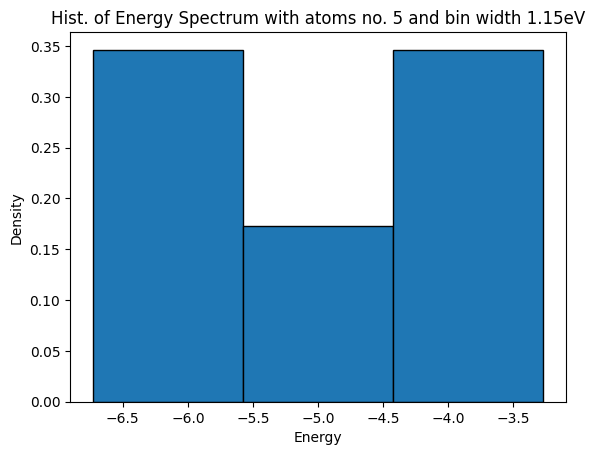

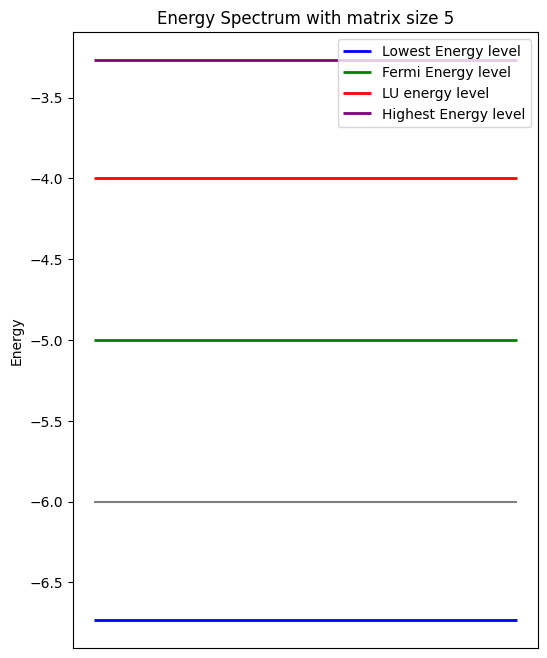

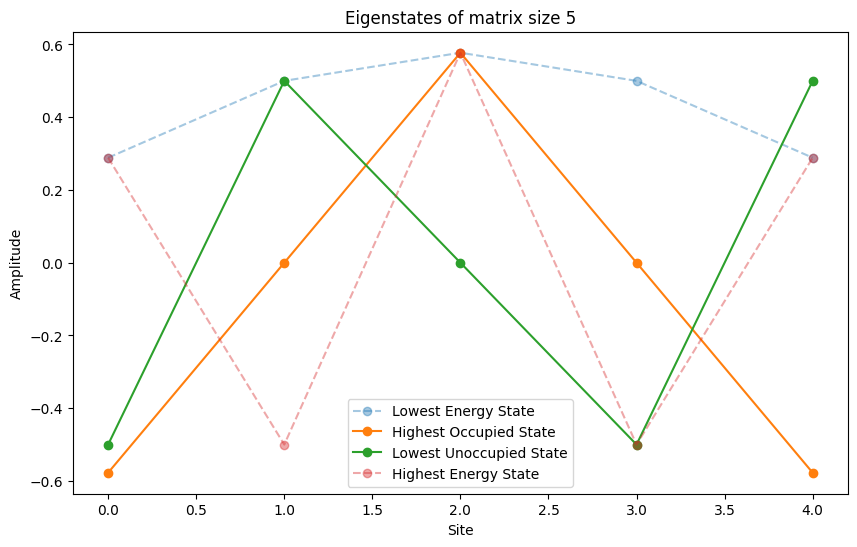

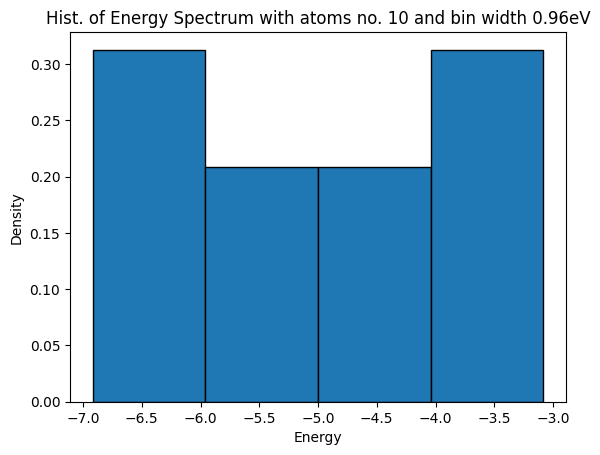

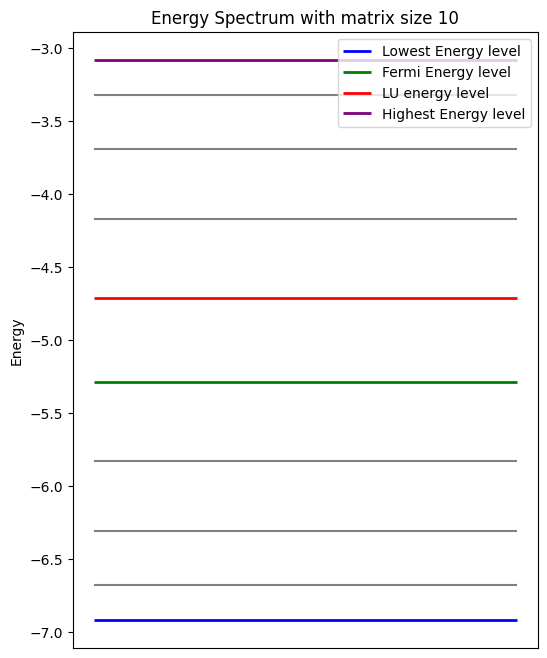

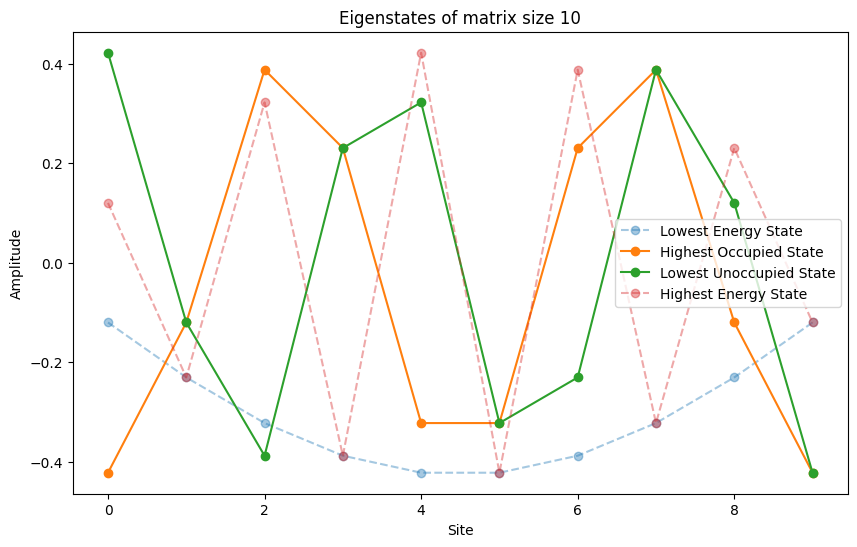

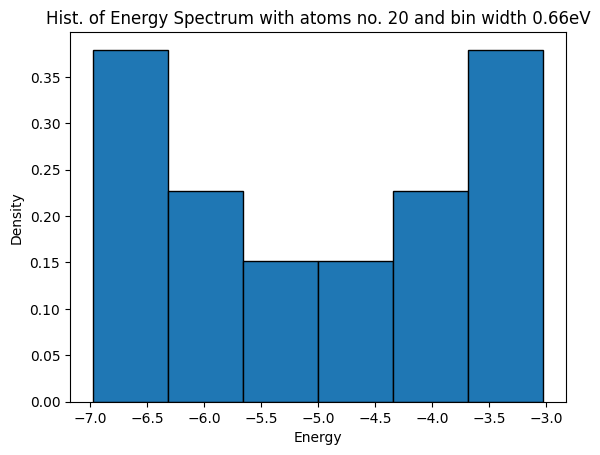

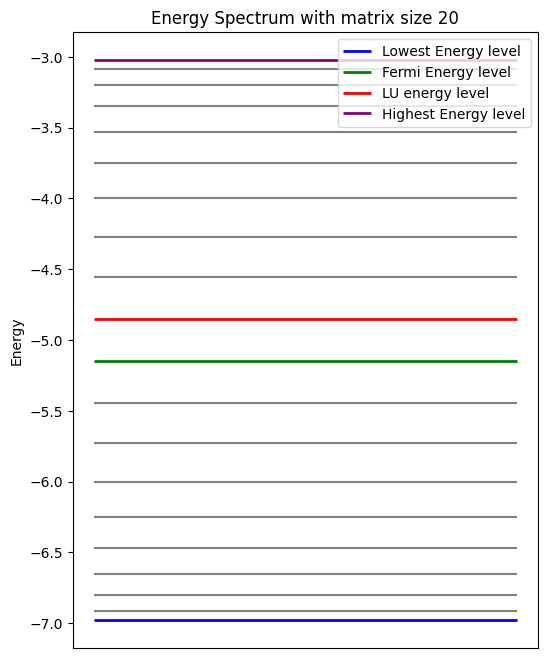

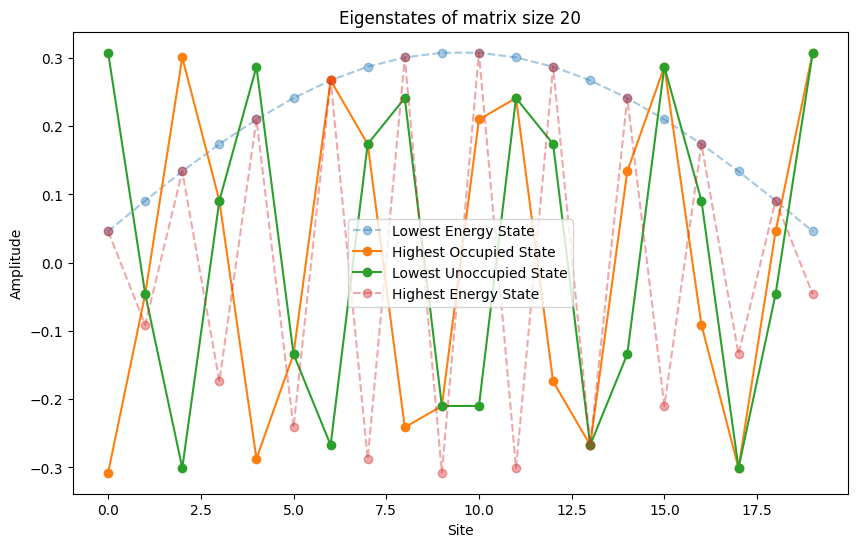

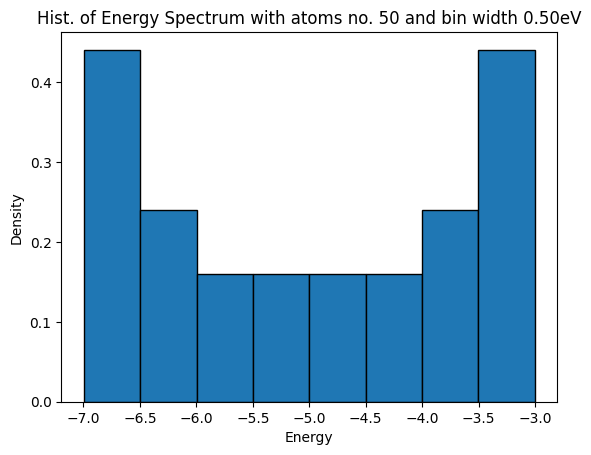

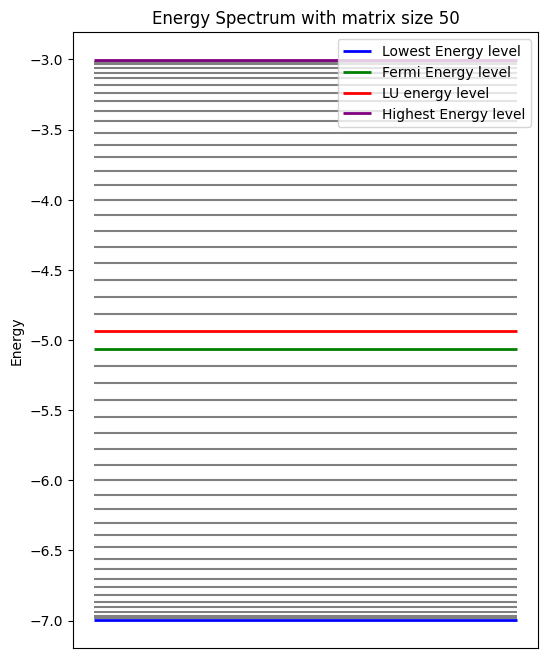

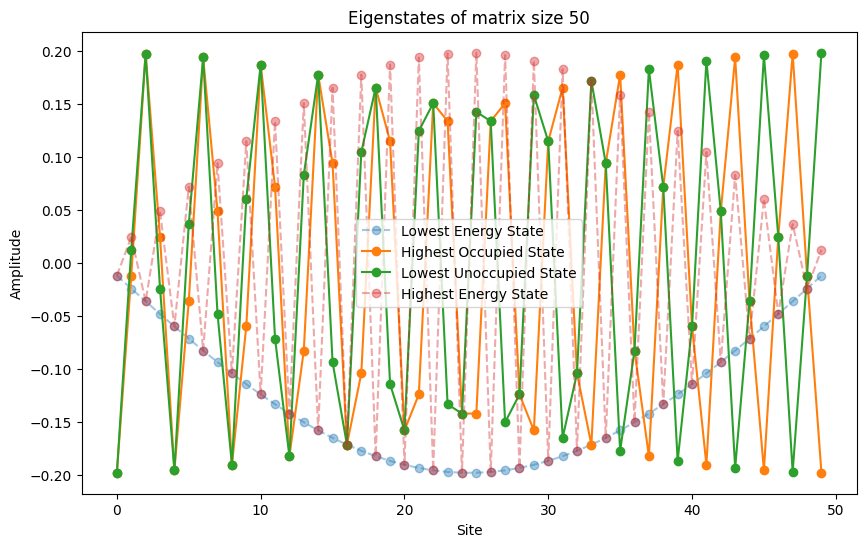

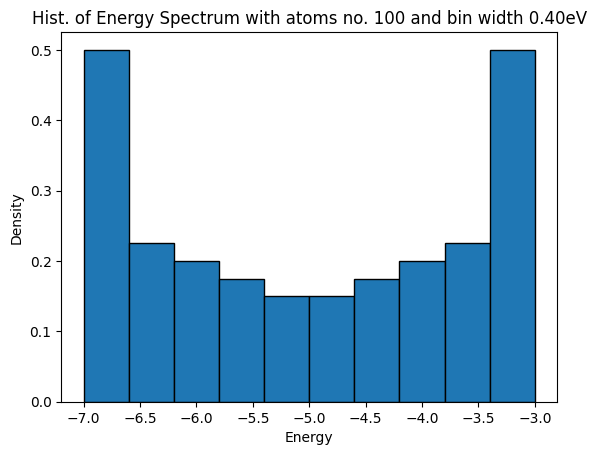

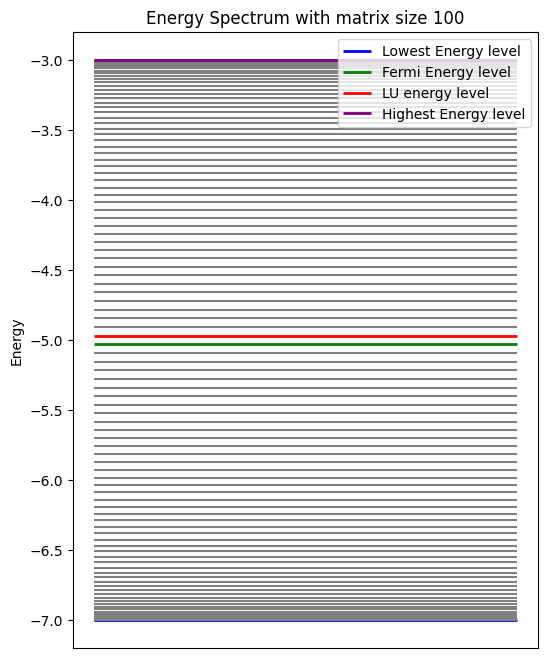

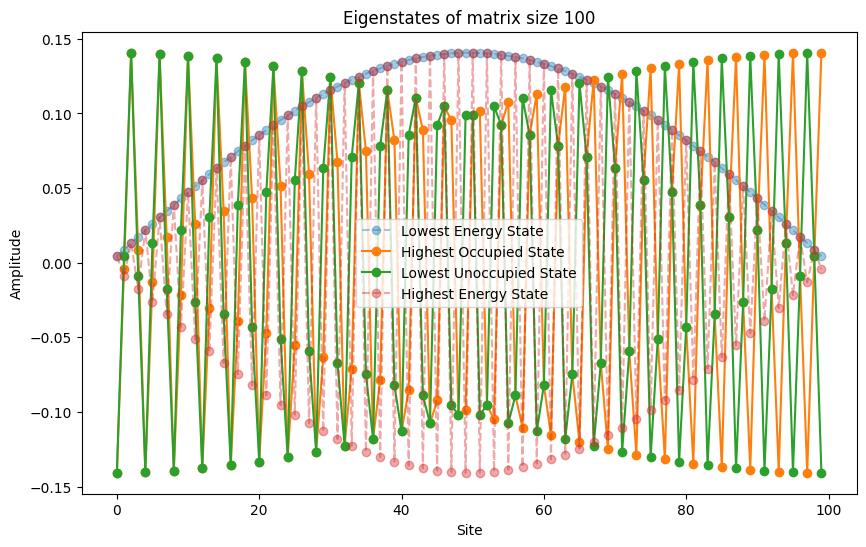

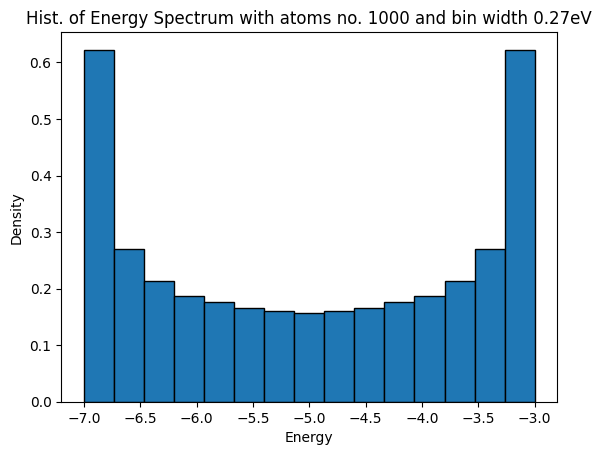

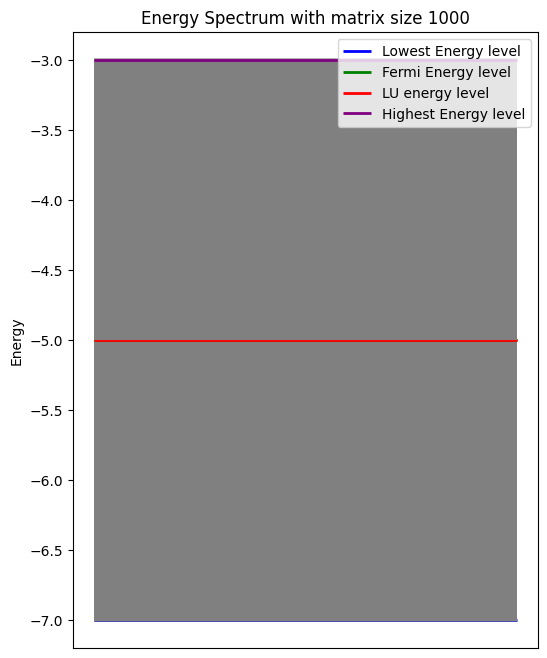

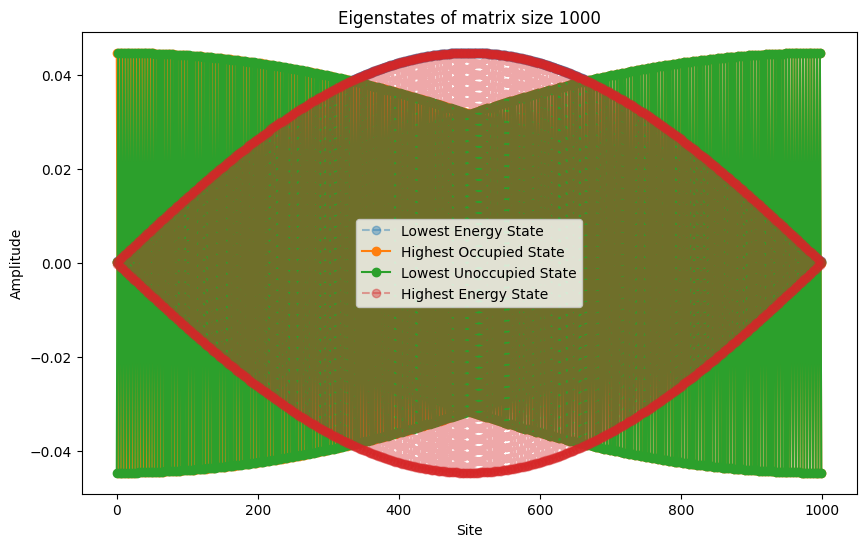

In [6]:
# PLOTS
n_list = [5,10,20,50,100,1000]

M = []
ev_list = [] # list of eigenvalues for different chain of atoms (5,10,20,50,100)

for n in n_list:
    A = create_matrix(-5,-1,n,False)
    M.append(A)

# PLOTS
# for n=5
histogram_plot(M[0],bin_no=3)
spectrum_lines_plot(M[0])
eigenstate_plot(M[0])

# for n=10
histogram_plot(M[1],bin_no=4)
spectrum_lines_plot(M[1])
eigenstate_plot(M[1])
# for n=20
histogram_plot(M[2],bin_no=6)
spectrum_lines_plot(M[2])
eigenstate_plot(M[2])
# for n=50
histogram_plot(M[3],bin_no=8)
spectrum_lines_plot(M[3])
eigenstate_plot(M[3])
# for n=100
histogram_plot(M[4],bin_no=10)
spectrum_lines_plot(M[4])
eigenstate_plot(M[4])

# for n=1000
histogram_plot(M[5],bin_no=15)
spectrum_lines_plot(M[5])
eigenstate_plot(M[5])
